In [1]:
cd

/Users/raghavraahul


In [2]:
cd Downloads/Datasets/Mall Customers

/Users/raghavraahul/Downloads/Datasets/Mall Customers


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.shape

(200, 5)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

<Figure size 1500x800 with 0 Axes>

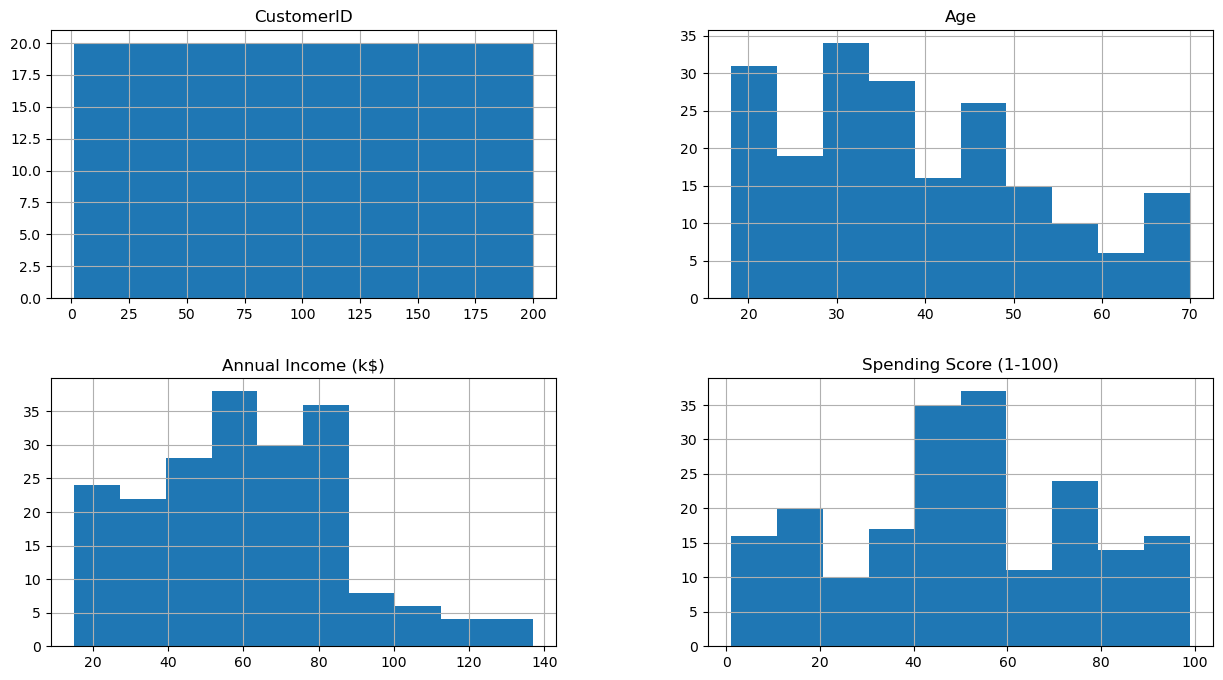

In [11]:
plt.figure(figsize = (15,8))
df.hist(figsize = (15,8))

In [12]:
pd.get_dummies(df.Gender)

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [13]:
df = df.join(pd.get_dummies(df.Gender))
df = df.drop(["Gender"], axis = 1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000,1.000000


In [15]:
#scaler = StandardScaler()
df[["Annual Income (k$)", "Age","Spending Score (1-100)"]]

,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40
...,...,...,...
195,120,35,79
196,126,45,28
197,126,32,74
198,137,32,18


In [16]:
#df[["Annual Income (k$)", "Age","Spending Score (1-100)"]] = scaler.fit_transform(df[["Annual Income (k$)", "Age","Spending Score (1-100)"]])

In [17]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000,1.000000


In [19]:
def optimise(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        model = KMeans(n_clusters = k)
        model.fit(data)
        
        means.append(k)
        inertias.append(model.inertia_)
    
    fig = plt.subplots(figsize = (10,8))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    
    

In [20]:
X = df.drop(["CustomerID","Female", "Male"], axis = 1)

/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

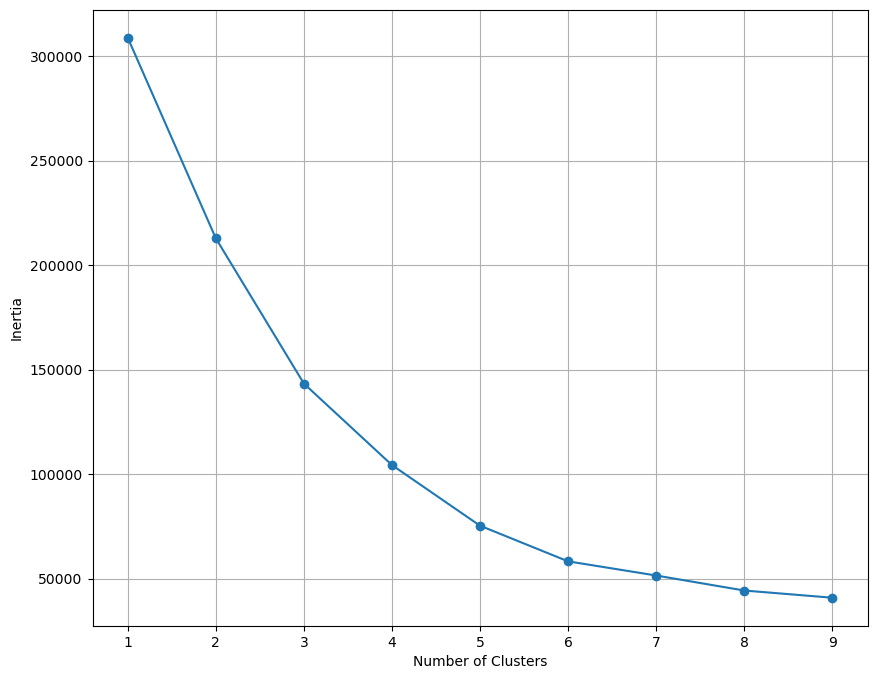

In [21]:
optimise(X, 10)

In [22]:
#kmeans = KMeans(n_clusters = 5)

In [23]:
#kmeans.fit(X)

In [24]:
#df["kmeans_5"] = kmeans.labels_

In [25]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [26]:
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    df[f'kMeans_{i}'] = kmeans.labels_

/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

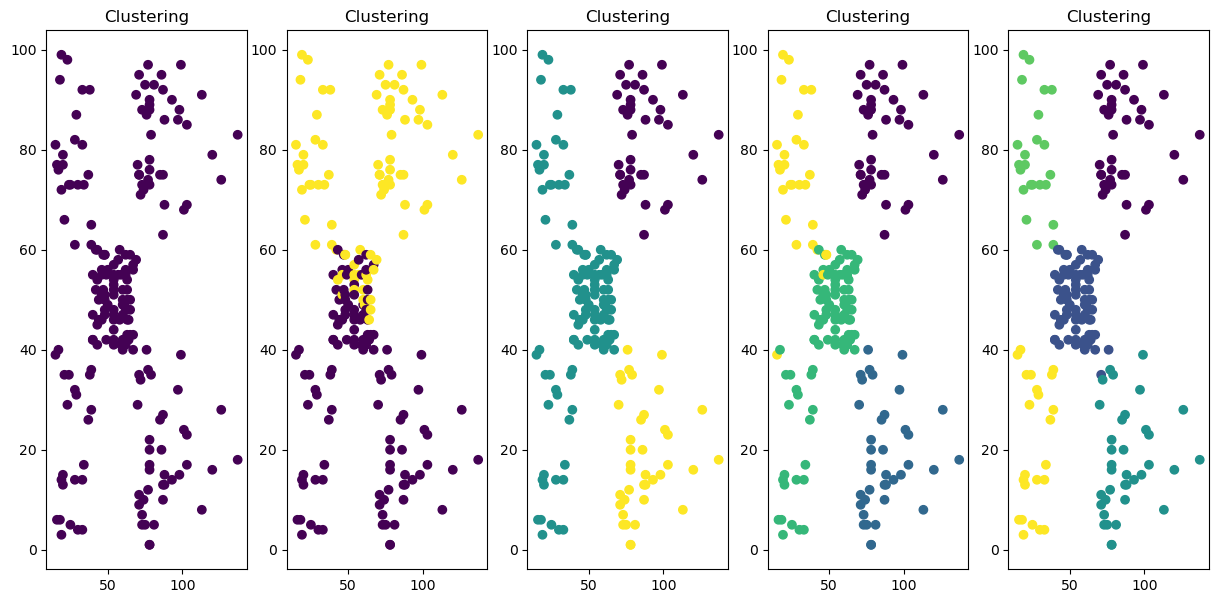

In [33]:
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (15,7))

for i,ax in enumerate(fig.axes, start = 1):
    ax.scatter(x = X["Annual Income (k$)"],y = X["Spending Score (1-100)"], c= df[f"kMeans_{i}"])
    #ax.xlabel("Annual Income (k$)")
    #ax.ylabel("Spending Score (1-100)")
    ax.set_title("Clustering")
    #ax.show()

In [34]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male,kMeans_1,kMeans_2,kMeans_3,kMeans_4,kMeans_5
0,1,19,15,39,0,1,0,0,1,3,4
1,2,21,15,81,0,1,0,1,1,3,3
2,3,20,16,6,1,0,0,0,1,2,4
3,4,23,16,77,1,0,0,1,1,3,3
4,5,31,17,40,1,0,0,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,2,1,2
197,198,32,126,74,0,1,0,1,0,0,0
198,199,32,137,18,0,1,0,0,2,1,2


In [50]:
model = KMeans(n_clusters = 4)
model.fit(X)
model.labels_

/Users/raghavraahul/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [51]:
from sklearn.metrics.cluster import rand_score

In [56]:
rand_score(df["kMeans_4"], model.labels_)

1.0

In [53]:
df["kMeans_4"]

0      3
1      3
2      2
3      3
4      2
      ..
195    0
196    1
197    0
198    1
199    0
Name: kMeans_4, Length: 200, dtype: int32

In [54]:
model.labels_

array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [57]:
from sklearn.metrics.cluster import fowlkes_mallows_score

In [58]:
fowlkes_mallows_score(df["kMeans_4"], model.labels_)

1.0

In [62]:
sum(model.labels_ != model.predict(X))

0